## Basic EDA

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy.fft as fft

In [31]:
data1 = pd.read_csv("data/RawData/acc_exp01_user01.txt", sep=" ", header=None, names = ('X','Y','Z'))

In [91]:
test = "data/RawData/acc_exp01_user01.txt"

In [98]:
data1['exp'] = test[20:22]
data1['user'] = test[-6:-4]

In [99]:
data1

,X,Y,Z,exp,user
0,0.918056,-0.112500,0.509722,01,01
1,0.911111,-0.093056,0.537500,01,01
2,0.881944,-0.086111,0.513889,01,01
3,0.881944,-0.086111,0.513889,01,01
4,0.879167,-0.100000,0.505556,01,01
...,...,...,...,...,...
20593,-0.069444,0.531944,0.806944,01,01
20594,-0.061111,0.519444,0.919444,01,01
20595,-0.051389,0.516667,0.956944,01,01
20596,-0.061111,0.525000,0.956944,01,01


In [100]:
test2 = 'data/RawData/gyro_exp03_user02.txt'

In [102]:
print(test2[21:23], test2[-6:-4])

03 02


In [80]:
#filenames = glob.glob('<some_path>/*.<extension>')
experiments = glob.glob('data/RawData/*.txt') 

In [82]:
experiments.sort()

In [84]:
# to remove the labels file from list
experiments.pop() 

'data/RawData/labels.txt'

In [87]:
len(experiments)

122

In [88]:
experiments

['data/RawData/acc_exp01_user01.txt',
 'data/RawData/acc_exp02_user01.txt',
 'data/RawData/acc_exp03_user02.txt',
 'data/RawData/acc_exp04_user02.txt',
 'data/RawData/acc_exp05_user03.txt',
 'data/RawData/acc_exp06_user03.txt',
 'data/RawData/acc_exp07_user04.txt',
 'data/RawData/acc_exp08_user04.txt',
 'data/RawData/acc_exp09_user05.txt',
 'data/RawData/acc_exp10_user05.txt',
 'data/RawData/acc_exp11_user06.txt',
 'data/RawData/acc_exp12_user06.txt',
 'data/RawData/acc_exp13_user07.txt',
 'data/RawData/acc_exp14_user07.txt',
 'data/RawData/acc_exp15_user08.txt',
 'data/RawData/acc_exp16_user08.txt',
 'data/RawData/acc_exp17_user09.txt',
 'data/RawData/acc_exp18_user09.txt',
 'data/RawData/acc_exp19_user10.txt',
 'data/RawData/acc_exp20_user10.txt',
 'data/RawData/acc_exp21_user10.txt',
 'data/RawData/acc_exp22_user11.txt',
 'data/RawData/acc_exp23_user11.txt',
 'data/RawData/acc_exp24_user12.txt',
 'data/RawData/acc_exp25_user12.txt',
 'data/RawData/acc_exp26_user13.txt',
 'data/RawDa

In [104]:
rawdatacombined = pd.DataFrame()
acc_orig = pd.DataFrame(columns = ('X', 'Y', 'Z', 'exp', 'user', 'activity'))
gyro_orig = pd.DataFrame(columns = ('X', 'Y', 'Z', 'exp', 'user', 'activity'))
for i in experiments:
    if "acc_" in i:
        temp_df = pd.read_csv(i, sep=" ", header=None, names = ('X','Y','Z'))
        
        temp_df['exp'] = i[20:22]
        temp_df['exp'] = temp_df['exp'].astype('int')
        
        temp_df['user'] = i[-6:-4].astype('int')
        temp_df['user'] = temp_df['user'].astype('int')
        
        temp_df['activity'] = 
        
        combine = [acc_orig, temp_df]
        acc_orig = pd.concat(combine, axis = 0)
    if "gyro_" in i:
        temp_df = pd.read_csv(i, sep=" ", header=None, names = ('X','Y','Z'))
        
        temp_df['exp'] = i[21:23]
        temp_df['exp'] = temp_df['exp'].astype('int')
       
        temp_df['user'] = i[-6:-4]
        temp_df['user'] = temp_df['user'].astype('int')
        
        combine = [gyro_orig, temp_df]
        gyro_orig = pd.concat(combine, axis = 0)

In [ ]:
rawdatacombined = pd.DataFrame()
acc_orig = pd.DataFrame(columns = ('X', 'Y', 'Z', 'exp', 'user', 'activity'))
gyro_orig = pd.DataFrame(columns = ('X', 'Y', 'Z', 'exp', 'user', 'activity'))
for i in experiments:
    if "acc_" in i:
        temp_df = pd.read_csv(i, sep=" ", header=None, names = ('X','Y','Z'))
        
        temp_df['exp'] = i[20:22]
        temp_df['exp'] = temp_df['exp'].astype('int')
        
        temp_df['user'] = i[-6:-4].astype('int')
        temp_df['user'] = temp_df['user'].astype('int')
        
        temp_df['activity'] = temp_df[(temp_df['exp'] == rawlabels['exp_id']) & (temp_df['user'] == rawlabels['user_id'])].loc[250:1232,['X']]
        
        combine = [acc_orig, temp_df]
        acc_orig = pd.concat(combine, axis = 0)
    if "gyro_" in i:
        temp_df = pd.read_csv(i, sep=" ", header=None, names = ('X','Y','Z'))
        
        temp_df['exp'] = i[21:23]
        temp_df['exp'] = temp_df['exp'].astype('int')
       
        temp_df['user'] = i[-6:-4]
        temp_df['user'] = temp_df['user'].astype('int')
        
        combine = [gyro_orig, temp_df]
        gyro_orig = pd.concat(combine, axis = 0)

In [147]:
rawlabels

,exp_id,user_id,activity,label_start,label_end
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194
3,1,1,8,2195,2359
4,1,1,5,2360,3374
5,1,1,11,3375,3662
6,1,1,6,3663,4538
7,1,1,10,4539,4735
8,1,1,4,4736,5667
9,1,1,9,5668,5859


In [174]:
activity_label = range(1,13,1)

for i in activity_label:
    index = rawlabels.index[(rawlabels['activity'] == i) & (rawlabels['exp_id'] == 1) & (rawlabels['user_id'] == 1)]
    print(index)
    for j in index:
        for k in j:
            start = rawlabels['label_start'][k]
            end = rawlabels['label_end'][k]
            data1['Activity'].loc[start:end] = rawlabels['activity'][k]


Int64Index([12, 13, 14, 15], dtype='int64')
Int64Index([17, 19, 21], dtype='int64')
Int64Index([16, 18, 20], dtype='int64')
Int64Index([2, 8], dtype='int64')
Int64Index([0, 4], dtype='int64')
Int64Index([6, 10], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([3], dtype='int64')
Int64Index([9], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([11], dtype='int64')


In [191]:
#working
activity_label = range(1,13,1)

for i in activity_label:
    index = rawlabels.index[(rawlabels['activity'] == i) & (rawlabels['exp_id'] == 1) & (rawlabels['user_id'] == 1)]
    #print(index)
    for k in index:
        #for k in j:
        start = rawlabels['label_start'][k]
        end = rawlabels['label_end'][k]
        data1.loc[start:end, ['activity']] = rawlabels['activity'][k]
        # working

In [ ]:
data1[(data1['exp'] == '01') & (data1['user'] == '01')].loc[250:1232,['activity']] = 

In [112]:
acc_orig

0         1
1         1
2         1
3         1
4         1
         ..
19077    61
19078    61
19079    61
19080    61
19081    61
Name: exp, Length: 1122772, dtype: int64

In [106]:
gyro_orig

,X,Y,Z,exp,user
0,-0.054978,-0.069639,-0.030849,01,01
1,-0.012523,0.019242,-0.038485,01,01
2,-0.023518,0.276417,0.006414,01,01
3,-0.093462,0.367741,0.001222,01,01
4,-0.124311,0.476780,-0.022907,01,01
...,...,...,...,...,...
19077,-1.154535,-0.653931,0.004276,61,30
19078,-0.858266,-0.429438,0.005803,61,30
19079,-0.268475,-0.193644,0.015577,61,30
19080,0.274278,-0.108734,0.105069,61,30


In [192]:
data1

,X,Y,Z,exp,user,activity
0,0.918056,-0.112500,0.509722,01,01,NaN
1,0.911111,-0.093056,0.537500,01,01,NaN
2,0.881944,-0.086111,0.513889,01,01,NaN
3,0.881944,-0.086111,0.513889,01,01,NaN
4,0.879167,-0.100000,0.505556,01,01,NaN
...,...,...,...,...,...,...
20593,-0.069444,0.531944,0.806944,01,01,NaN
20594,-0.061111,0.519444,0.919444,01,01,NaN
20595,-0.051389,0.516667,0.956944,01,01,NaN
20596,-0.061111,0.525000,0.956944,01,01,NaN


In [144]:
labels

NameError: name 'labels' is not defined

In [143]:
data1[(data1['exp'] == '01') & (data1['user'] == '01')].loc[250:1232]

,X,Y,Z,exp,user
250,1.020833,-0.125000,0.105556,01,01
251,1.025000,-0.125000,0.101389,01,01
252,1.020833,-0.125000,0.104167,01,01
253,1.016667,-0.125000,0.108333,01,01
254,1.018056,-0.127778,0.108333,01,01
...,...,...,...,...,...
1228,1.022222,-0.137500,0.077778,01,01
1229,1.025000,-0.137500,0.076389,01,01
1230,1.030556,-0.144444,0.079167,01,01
1231,1.016667,-0.143056,0.058333,01,01


In [120]:
data1['X'].iloc[250:1232]

250     1.020833
251     1.025000
252     1.020833
253     1.016667
254     1.018056
          ...   
1227    1.019445
1228    1.022222
1229    1.025000
1230    1.030556
1231    1.016667
Name: X, Length: 982, dtype: float64

In [35]:
# experiment id, user id are to identify the participant and which experiment the data belongs to
# activity is which exercise was performed
# label start and label end are which rows of the experiment the labels belong to
rawlabelcolumns = ['exp_id','user_id','activity','label_start','label_end']

In [36]:
rawlabels = pd.read_csv("data/RawData/labels.txt", sep = ' ', header = None, names = rawlabelcolumns)

In [37]:
rawlabels

,exp_id,user_id,activity,label_start,label_end
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194
3,1,1,8,2195,2359
4,1,1,5,2360,3374
...,...,...,...,...,...
1209,61,30,2,13842,14574
1210,61,30,3,14751,15427
1211,61,30,2,15588,16319
1212,61,30,3,16546,17250


In [74]:
datalabels = pd.read_csv('data/features2.txt', header = None)

In [75]:
datalabels[datalabels.duplicated()]

,0


In [72]:
X_test = pd.read_csv("data/Test/X_test.txt", sep = ' ', header = None, names = datalabels[0])

In [73]:
X_test

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [ ]:
data1 

In [193]:
data1

,X,Y,Z,exp,user,activity
0,0.918056,-0.112500,0.509722,01,01,NaN
1,0.911111,-0.093056,0.537500,01,01,NaN
2,0.881944,-0.086111,0.513889,01,01,NaN
3,0.881944,-0.086111,0.513889,01,01,NaN
4,0.879167,-0.100000,0.505556,01,01,NaN
...,...,...,...,...,...,...
20593,-0.069444,0.531944,0.806944,01,01,NaN
20594,-0.061111,0.519444,0.919444,01,01,NaN
20595,-0.051389,0.516667,0.956944,01,01,NaN
20596,-0.061111,0.525000,0.956944,01,01,NaN


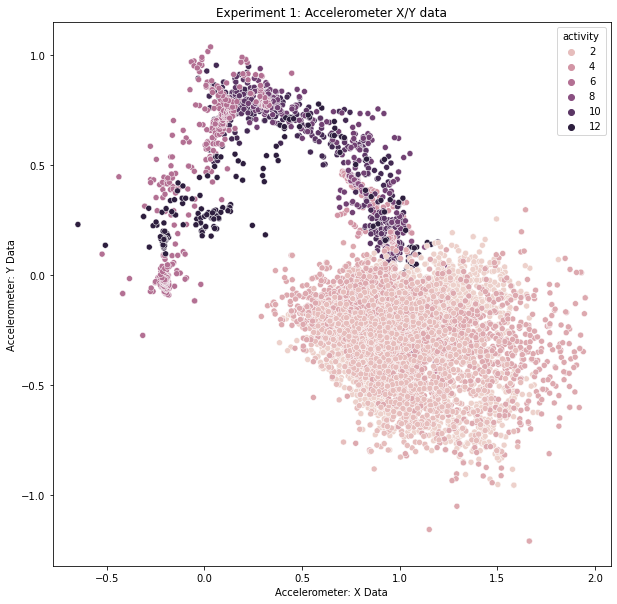

In [199]:
plt.figure(figsize = (10,10))

sns.scatterplot(x = data1['X'],y = data1['Y'], hue = data1['activity'])
plt.title('Experiment 1: Accelerometer X/Y data')

plt.xlabel('Accelerometer: X Data')
plt.ylabel('Accelerometer: Y Data')
plt.savefig('Plot1.png')
plt.show()


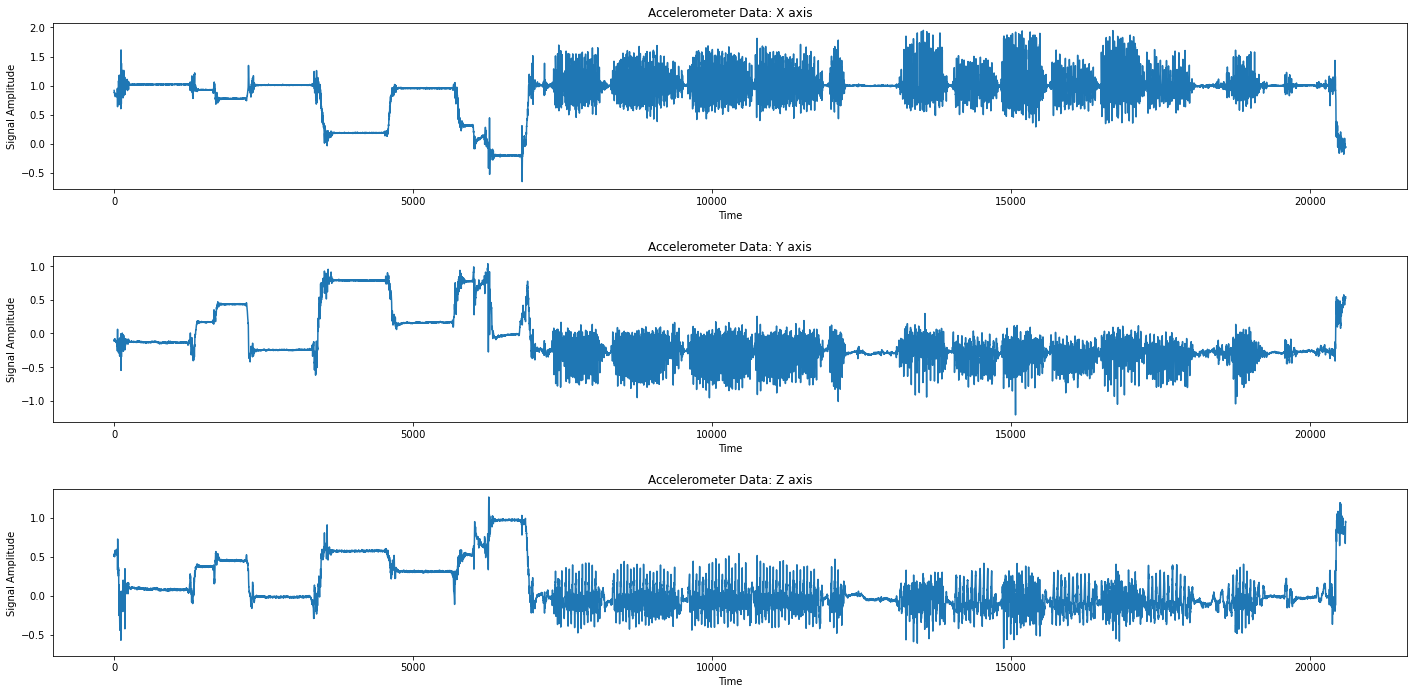

In [205]:
plt.subplots(3,1, figsize = (20,10))

plt.subplot(3,1,1)
plt.plot(data1['X'])
plt.ylabel('Signal Amplitude')
plt.xlabel('Time')
plt.title('Accelerometer Data: X axis')

plt.subplot(3,1,2)
plt.plot(data1['Y'])
plt.ylabel('Signal Amplitude')
plt.xlabel('Time')
plt.title('Accelerometer Data: Y axis')

plt.subplot(3,1,3)
plt.plot(data1['Z'])
plt.ylabel('Signal Amplitude')
plt.xlabel('Time')
plt.title('Accelerometer Data: Z axis')

plt.tight_layout(pad = 2)
plt.savefig('Plot2.png')

plt.show()